# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 43

Członkowie: Dominik Sakłaski (415120), Roksana Jandura (416314), Karolina Murzyn (409892)

---

## Zestaw zadań 2: Zmiany GDP w okresie globalnego kryzysu finansowego 2008–2009 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl oraz dane z pliku recession_table_1.pkl do zmiennej `recession_table_1`.

W celu wczytania danych umieść plik w tym samym folderze, w którym znajduje się notatnik.

In [3]:
recession_data_1 = pd.read_pickle("recession_data_1.pkl")
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


In [4]:
recession_table_1 = pd.read_pickle("recession_table_1.pkl")
recession_table_1


,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.0,0.0,0.005051,0.075758,0.358586,0.469697,0.070707,0.005051,0.0,0.010101,0.005051
2007,0.0,0.0,0.010101,0.030303,0.393939,0.454545,0.085859,0.020202,0.005051,0.0,0.0
2008,0.005051,0.005051,0.025253,0.131313,0.454545,0.323232,0.045455,0.010101,0.0,0.0,0.0
2009,0.010101,0.045455,0.131313,0.29798,0.343434,0.136364,0.030303,0.0,0.005051,0.0,0.0
2010,0.0,0.0,0.025253,0.085859,0.449495,0.363636,0.060606,0.005051,0.005051,0.005051,0.0
2011,0.0,0.010101,0.030303,0.085859,0.484848,0.343434,0.035354,0.005051,0.005051,0.0,0.0


### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [5]:
# YOUR CODE HERE
descriptive_parameters_1 = pd.DataFrame(index=['mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max', 'kurt', 'skew'])
year_data = ['2006', '2007', '2008', '2009', '2010', '2011']
for year in year_data:
    year_data = recession_data_1[year].dropna()  #usuwa wszystkie wiersze z NULL
    descriptive_parameters_1[year] = [
        year_data.mean(),   # średnia
        year_data.std(),    # odchylenie standardowe
        year_data.min(),    # minimum
        year_data.quantile(0.25),  # pierwszy Q
        year_data.median(),  # mediana, drugi Q
        year_data.quantile(0.75),  # trzeci Q
        year_data.max(),    # maksimum
        year_data.kurtosis(),  # eksces/kurtoza
        year_data.skew()    # skośność
    ]

display(descriptive_parameters_1.round(2))


# WERSJA DRUGA Z WYKORZYSTANIEM FUNKCJI describe(), KTÓRA OBLICZA WIĘKSZOŚĆ STATYSTYK
#descriptive_parameters_1 = pd.DataFrame(index=['mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max', 'kurt', 'skew'])

#year_data = ['2006', '2007', '2008', '2009', '2010', '2011']

#for year in year_data:
#    data = recession_data_1[year].dropna()  # Usuwa wszystkie wiersze z NULL
#    
#    stats = data.describe(percentiles=[.25, .5, .75]) # Użycie funkcji describe() do obliczenia większości statystyk
#    # tych dwóch statystyk nie znajdziemy w describe()
#    stats['kurt'] = data.kurtosis()
#    stats['skew'] = data.skew()
    
#    descriptive_parameters_1[year] = [
#        stats['mean'],  
#        stats['std'],   
#        stats['min'],   
#        stats['25%'],   
#        stats['50%'],   
#        stats['75%'],   
#        stats['max'],
#        stats['kurt'],
#        stats['skew']    
#    ]

#display(descriptive_parameters_1.round(2))

,2006,2007,2008,2009,2010,2011
mean,5.68,5.68,3.66,-0.10,4.29,3.81
std,4.66,4.13,4.49,5.81,4.50,4.35
min,-6.87,-6.68,-17.67,-17.57,-8.92,-12.71
Q1,3.46,3.20,1.00,-3.74,1.72,1.64
Q2,5.40,5.62,3.81,0.13,4.13,3.82
Q3,7.56,7.70,6.24,3.50,6.71,6.32
max,34.50,25.00,17.80,21.39,25.12,21.62
kurt,10.16,2.88,3.17,0.93,3.44,3.11
skew,1.87,0.72,-0.60,-0.15,0.65,-0.11


In [6]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_1.loc["mean", "2006"], 5.678241)
assert np.isclose(descriptive_parameters_1.loc["std", "2007"], 4.128360)
assert np.isclose(descriptive_parameters_1.loc["min", "2008"], -17.668946)
assert np.isclose(descriptive_parameters_1.loc["Q1", "2009"], -3.739051)
assert np.isclose(descriptive_parameters_1.loc["Q2", "2010"], 4.132582)
assert np.isclose(descriptive_parameters_1.loc["Q3", "2011"], 6.316869)
assert np.isclose(descriptive_parameters_1.loc["max", "2006"], 34.5)
assert np.isclose(descriptive_parameters_1.loc["kurt", "2007"], 2.877701)
assert np.isclose(descriptive_parameters_1.loc["skew", "2008"], -0.597186)

### Zadanie 5: Praca z szeregami rozdzielczymi (25 pkt)
Na potrzeby realizacji tego zadania załóżmy, że nie były dostępne dane szczegółowe, a jedynie tablica szeregu rozdzielczego przedziałowego. Ma to istotny wpływ na proces dokonywania obliczeń i wizualizacji wyników. Wykonaj poniższe zadanie bazując wyłącznie na danych z tablicy `recession_table_1`.

Uwaga! Zadanie nie zawiera pełnej analizy danych, i ma wyłącznie charakter demonstracji pokazującej jak można prowadzić analizę, gdy nie są dostępne dane szczegółowe.

#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

> Indeks: </br>
> Zawiera wiersze o następujących nazwach: mean, std, Q1, Q2, Q3, mode.

> Kolumny: lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str) </br>

Uwaga! W celu otrzymania maksymalnej liczby punktów otrzymane wyniki powinny być w całości wynikiem pracy napisanego kodu, bez manualnego określania, w którym przedziale znajdują się określone statystyki itp.

In [7]:
# YOUR CODE HERE

mean = pd.Series(0.0, index=recession_table_1.index)
for column in recession_table_1.columns:
    class_midpoint = column.mid
    mean += class_midpoint * recession_table_1[column]
mean=pd.to_numeric(mean)


std = pd.Series(0.0, index=recession_table_1.index)
for column in recession_table_1.columns:
    std += (column.mid - mean) ** 2 * recession_table_1[column]
std = pd.to_numeric(std)
std = np.sqrt(std)


Q1 = pd.Series(0.0, index=recession_table_1.index)
Q2 = pd.Series(0.0, index=recession_table_1.index)
Q3 = pd.Series(0.0, index=recession_table_1.index)


for index in recession_table_1.index:
    row = recession_table_1.loc[index]
    cumulative = row.cumsum()
    n_total = row.sum()

    for target, quartile in zip([Q1, Q2, Q3], [0.25, 0.5, 0.75]):
        position = quartile * n_total

        for i, cum_val in enumerate(cumulative):
            if cum_val >= position:
                k = i
                break

        class_interval = recession_table_1.columns[k]
        xk = class_interval.left
        nk = row[class_interval]
        ik = class_interval.length
        F = cumulative.iloc[k - 1] if k > 0 else 0

        q_value = xk + ((position - F) / nk) * ik
        target[index] = q_value


mode = pd.Series(0.0, index=recession_table_1.index)
for index in recession_table_1.index:
    row = recession_table_1.loc[index]
    modal_col = row.idxmax()
    modal_pos = list(recession_table_1.columns).index(modal_col)

    if modal_pos == 0 or modal_pos == len(recession_table_1.columns) - 1:
        mode[index] = modal_col.mid 
        continue

    nD = row[modal_col]
    nD_prev = row[recession_table_1.columns[modal_pos - 1]]
    nD_next = row[recession_table_1.columns[modal_pos + 1]]

    xD = modal_col.left
    iD = modal_col.length

    numerator = nD - nD_prev
    denominator = (nD - nD_prev) + (nD - nD_next)
    mode[index] = xD + (numerator / denominator) * iD

descriptive_parameters_2 = pd.DataFrame({
    'mean': mean,
    'std': std,
    'Q1': Q1,
    'Q2': Q2,
    'Q3': Q3,
    'mode': mode}).T 

descriptive_parameters_2.columns = descriptive_parameters_2.columns.astype(str)
display(descriptive_parameters_2)

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.101010,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992187,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.900000,4.044944,3.691589


In [8]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_2.loc["mean", "2006"], 5.606061)
assert np.isclose(descriptive_parameters_2.loc["std", "2007"], 4.184001)
assert np.isclose(descriptive_parameters_2.loc["Q1", "2008"], 0.916667)
assert np.isclose(descriptive_parameters_2.loc["Q2", "2009"], 0.220588)
assert np.isclose(descriptive_parameters_2.loc["Q3", "2010"], 7.604167)
assert np.isclose(descriptive_parameters_2.loc["mode", "2011"], 3.691589)

#### b) Wizualizacja
Zwizualizuj dane z tablic `recession_table_1` oraz `descriptive_parameters_2` za pomocą:
 - histogramu zliczeń (lewa oś wykresu) z nałożonym na niego łamaną częstości skumulowanej (prawa oś wykresu) wykonanych dla jednego, wybranego przez siebie roku,
 - diagramów częstości wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych,
 - wykresów pudełkowych wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych.
 
Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x2, przy czym wykres pudełkowy zajmuje oba pola w dolnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Postaraj się, w miarę istniejących możliwości, aby formatowanie wykresów było jak najbardziej zbliżone do formatowania wykresów przygotowanych w poprzednim notatniku, dodatkowo:

dla histogramu i łamanej częstości skumulowanej:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- ustaw kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla diagramów częstości:
- ustaw kolory identyczne z tymi przypisanymi poszczególnym latom w zadaniu 3a,
- dodaj do wykresu legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla wykresu pudełkowego:
- ustaw kolor linii pudełka identyczny z kolorem ich wypełnienia w zadaniu 3b,
- ustaw kolor linii wąsów identyczny z ich kolorem w zadaniu 3b.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.

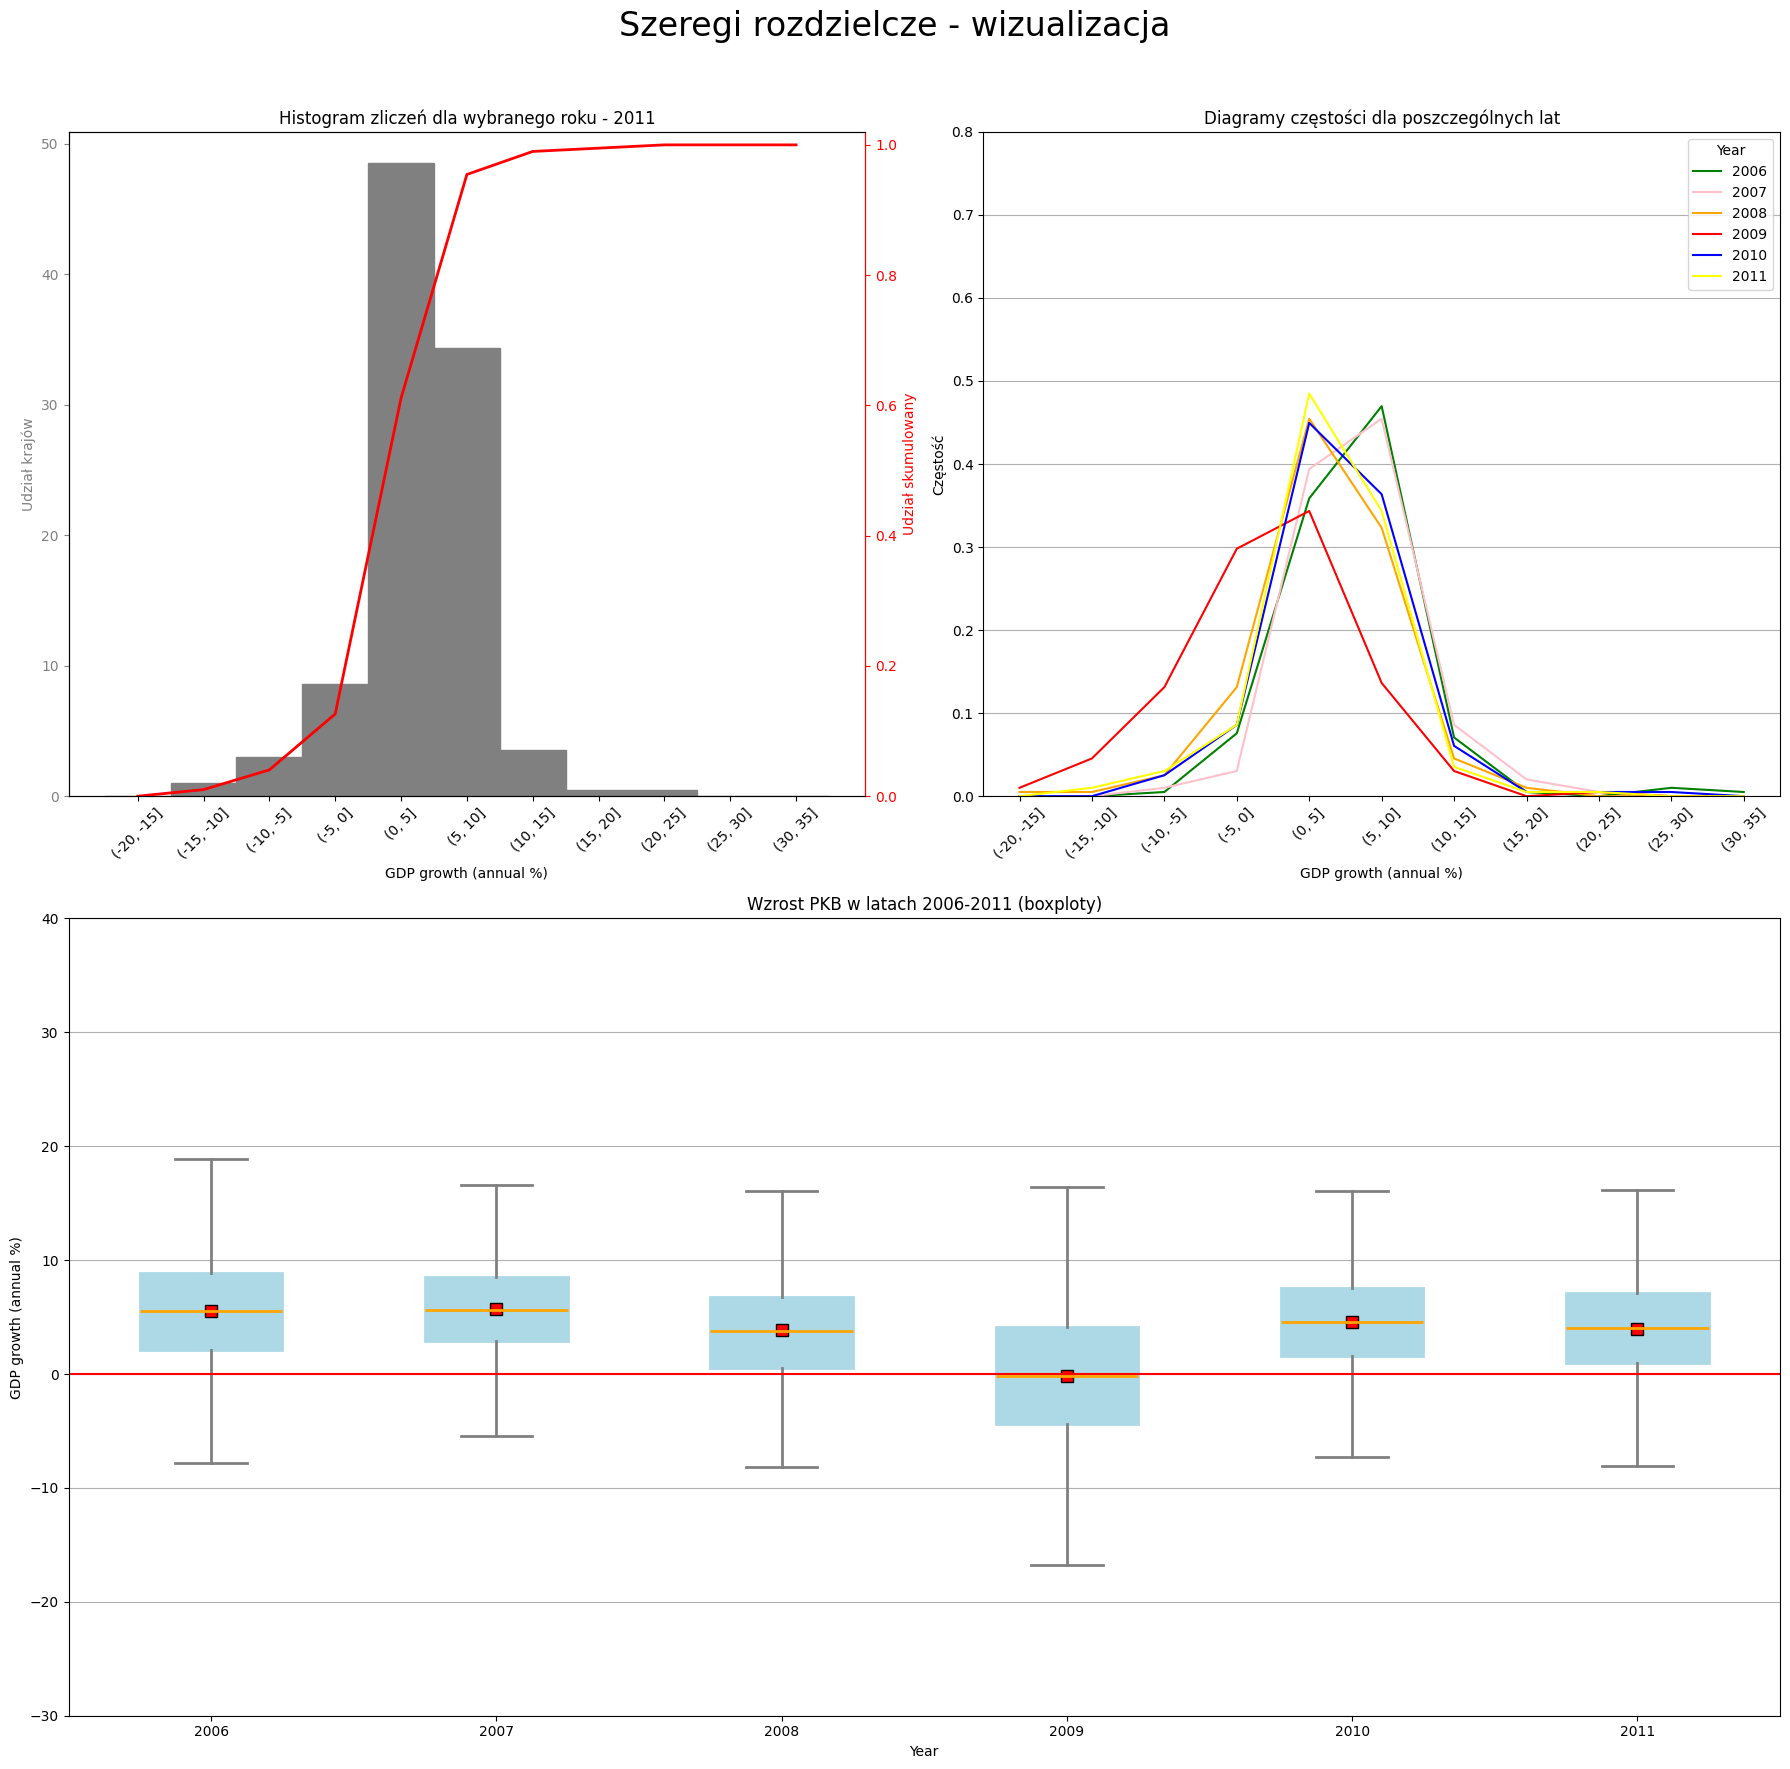

In [9]:
# Definicja figury i miejsc wykresów
fig = plt.figure(figsize=(18, 18), facecolor="white")
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

ax_histogram = fig.add_subplot(gs[0, 0])    # Histogram + skumulowana linia
ax_frequency = fig.add_subplot(gs[0, 1])    # Diagramy częstości
ax_boxplot = fig.add_subplot(gs[1, :])      # Boxplot na całą dolną część

selected_year = '2011'
hist_values = recession_table_1.loc[selected_year] * 100
cum_values = recession_table_1.loc[selected_year].cumsum()

# Histogram dla wybranego roku 2011
bars = ax_histogram.bar(hist_values.index.astype(str), hist_values.values, color='gray', edgecolor='gray', width=1.0)
ax_histogram.set_title(f"Histogram zliczeń dla wybranego roku - {selected_year}")
ax_histogram.set_xlabel("GDP growth (annual %)")
ax_histogram.set_ylabel("Udział krajów", color='gray')
ax_histogram.tick_params(axis='y', colors='gray')
ax_histogram.tick_params(axis='x', rotation=45)
ax_histogram.grid(False)  # <<< WYŁĄCZAMY siatkę

# Linia skumulowana do histogramu
ax2 = ax_histogram.twinx()
ax2.plot(hist_values.index.astype(str), cum_values.values, color='red', linewidth=2)  
ax2.set_ylabel("Udział skumulowany", color='red')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim(0, 1.02)
ax2.spines['right'].set_color('red')
ax2.grid(False)


# Diagramy częstości 

# Kolory przypisane do lat (tak jak w zadaniu 3a)
colors = {
    '2006': "green",
    '2007': "pink",
    '2008': "orange",
    '2009': "red",
    '2010': "blue",
    '2011': "yellow"
}

years = ['2006', '2007', '2008', '2009', '2010', '2011']

df_melted = recession_table_1.reset_index().melt(id_vars="Year", var_name="Interval", value_name="Frequency")
df_melted["Interval"] = df_melted["Interval"].astype(str)

# Rysowanie każdej serii osobno dla kontroli koloru
for year in years:
    subset = df_melted[df_melted['Year'] == year]
    ax_frequency.plot(subset["Interval"], subset["Frequency"], linestyle='-', color=colors[year], label=year)

ax_frequency.set_title("Diagramy częstości dla poszczególnych lat")
ax_frequency.set_xlabel("GDP growth (annual %)")
ax_frequency.set_ylabel("Częstość")
ax_frequency.legend(title="Year", ncol=1)
ax_frequency.tick_params(axis='x', rotation=45)
ax_frequency.set_ylim([0, 0.8])
ax_frequency.grid(True, axis='y')
ax_frequency.grid(False, axis='x')

# Boxploty dla wszystkich lat 

boxplot_simulation = []

for yr in years:
    avg = descriptive_parameters_2.loc["mean", yr]
    deviation = descriptive_parameters_2.loc["std", yr]
    simulated = np.random.normal(loc=avg, scale=deviation, size=800)
    boxplot_simulation.append(simulated)

box = ax_boxplot.boxplot(boxplot_simulation, patch_artist=True, labels=years, showfliers=False,
                         boxprops=dict(color="lightblue", facecolor="lightblue", linewidth=2),
                         whiskerprops=dict(color="gray", linewidth=2),
                         capprops=dict(color="gray", linewidth=2),
                         medianprops=dict(color="orange", linewidth=2),
                         #flierprops=dict(marker='o', markerfacecolor='green', markersize=6, markeredgecolor='green') # usuwam wartości odstające (showfliers=False), bo w tym poleceniu nie jest nic wspomniane o wartościach odtsjących (ma być : "Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.")
)

# Dodanie średnich (czerwony kwadrat)
for idx, dataset in enumerate(boxplot_simulation):
    ax_boxplot.plot(idx + 1, np.mean(dataset), marker='s', color='red', markeredgecolor='black', markersize=8)

ax_boxplot.set_title("Wzrost PKB w latach 2006-2011 (boxploty)")
ax_boxplot.set_xlabel("Year")
ax_boxplot.set_ylabel("GDP growth (annual %)")
ax_boxplot.set_ylim([-30, 40])
ax_boxplot.axhline(y=0, color='red', linestyle='-')
ax_boxplot.grid(True, axis='y')
ax_boxplot.grid(False, axis='x')


fig.suptitle("Szeregi rozdzielcze - wizualizacja", size=24)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
